In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Load the dataset
file_path = "/kaggle/input/us-christmas-tree-sales/Week 40 - US Christmas Tree Sales - 2010 to 2016.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,index,Year,Type of tree,Number of trees sold,Average Tree Price,Sales
0,0,2010,Real tree,27000000,36.12,975240000
1,1,2011,Real tree,30800000,34.87,1073996000
2,2,2012,Real tree,24500000,40.30,987350000
3,3,2013,Real tree,33020000,35.30,1165606000
4,4,2014,Real tree,26300000,39.50,1038850000


In [2]:
df.describe()

,index,Year,Number of trees sold,Average Tree Price,Sales
count,14.0000,14.000000,1.400000e+01,14.000000,1.400000e+01
mean,6.5000,2013.000000,2.023000e+07,59.446429,1.098326e+09
std,4.1833,2.075498,8.502216e+06,20.110086,4.148357e+08
min,0.0000,2010.000000,8.200000e+06,34.870000,5.298020e+08
25%,3.2500,2011.250000,1.285000e+07,39.700000,8.714475e+08
50%,6.5000,2013.000000,2.155000e+07,64.105000,1.013100e+09
75%,9.7500,2014.750000,2.682500e+07,72.012500,1.187734e+09
max,13.0000,2016.000000,3.302000e+07,98.700000,2.046780e+09


**How is the distribution of the Number of trees sold over the years?**

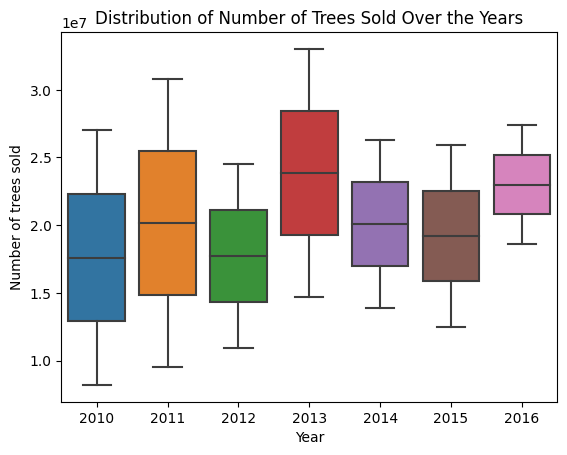

In [3]:
# Distribution of Number of trees sold over the years
sns.boxplot(x='Year', y='Number of trees sold', data=df)
plt.title('Distribution of Number of Trees Sold Over the Years')
plt.show()


**Can we visualize the average tree price trends over the years?**

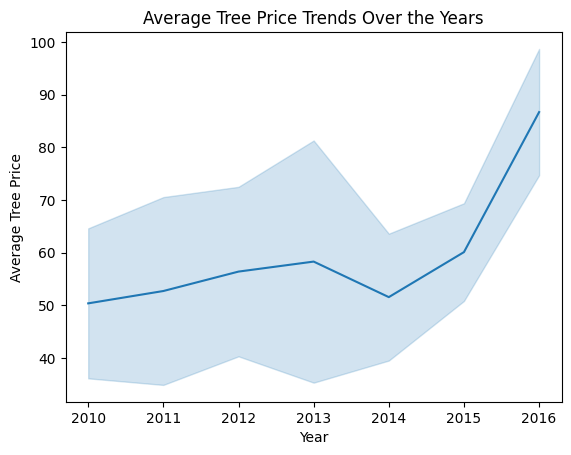

In [4]:
# Average Tree Price trends over the years
sns.lineplot(x='Year', y='Average Tree Price', data=df)
plt.title('Average Tree Price Trends Over the Years')
plt.show()


**What are the popular types of Christmas trees sold?**

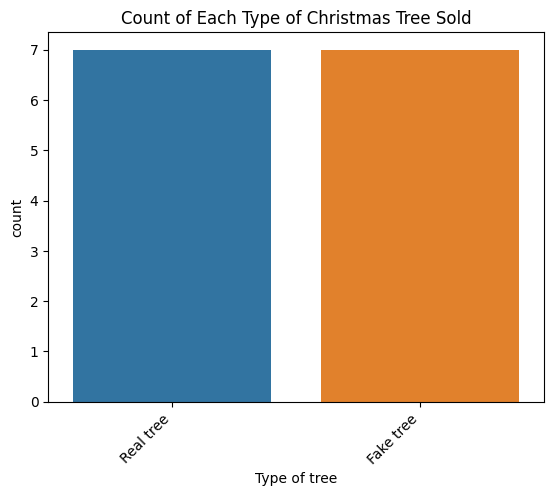

In [5]:
# Countplot of Types of trees
sns.countplot(x='Type of tree', data=df)
plt.title('Count of Each Type of Christmas Tree Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


**How does the overall sales revenue vary across different tree types?**

In [6]:
# Total Sales Revenue by Tree Type
fig = px.bar(df, x='Type of tree', y='Sales', color='Type of tree',
             title='Total Sales Revenue by Tree Type')
fig.show()


**How does the total number of Christmas trees sold vary each year?**

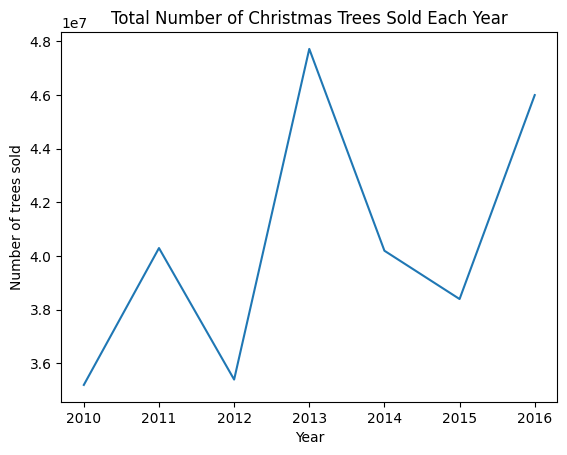

In [7]:
# Line plot showing the total number of trees sold each year
sns.lineplot(x='Year', y='Number of trees sold', data=df.groupby('Year')['Number of trees sold'].sum().reset_index())
plt.title('Total Number of Christmas Trees Sold Each Year')
plt.show()


**Can we visualize the correlation between Average Tree Price and Sales?**

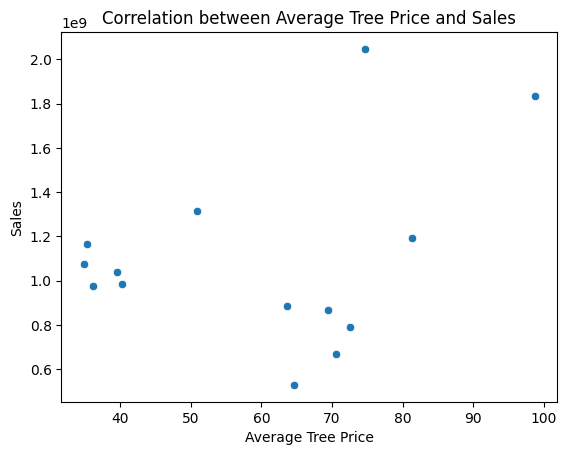

In [8]:
# Scatter plot showing the correlation between Average Tree Price and Sales
sns.scatterplot(x='Average Tree Price', y='Sales', data=df)
plt.title('Correlation between Average Tree Price and Sales')
plt.show()


**What is the distribution of sales across different years and tree types?**

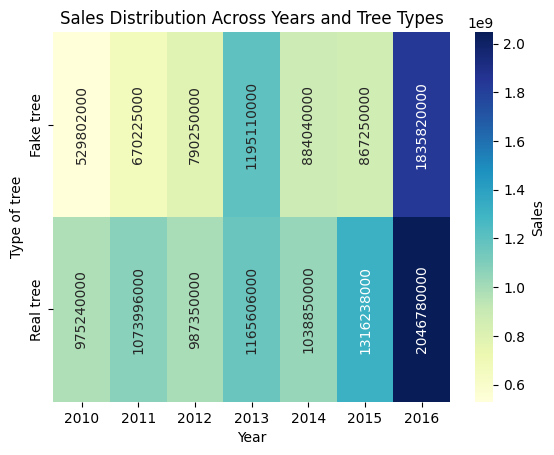

In [9]:
# Assuming df is your DataFrame
# Heatmap showing Sales distribution across different years and tree types
sales_pivot = df.pivot_table(values='Sales', index='Type of tree', columns='Year', aggfunc='sum')

# Create the heatmap with rotated values
heatmap = sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Sales'}, annot_kws={'rotation': 90})

# Set the title
plt.title('Sales Distribution Across Years and Tree Types')

# Show the plot
plt.show()

**How can we use Altair to create an interactive chart for Average Tree Price?**

In [10]:
# Altair interactive chart for Average Tree Price
alt.Chart(df).mark_circle().encode(
    x='Year',
    y='Average Tree Price',
    size='Number of trees sold',
    color='Type of tree',
    tooltip=['Year', 'Type of tree', 'Average Tree Price', 'Number of trees sold']
).interactive()


alt.Chart(...)

**Can we visualize the annual distribution of the total number of trees sold?**

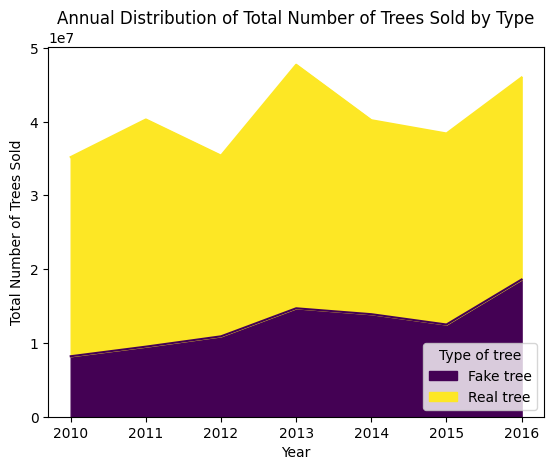

In [11]:
# Stacked area chart for annual distribution of total number of trees sold
df_pivot = df.pivot_table(values='Number of trees sold', index='Year', columns='Type of tree', aggfunc='sum', fill_value=0)
df_pivot.plot.area(stacked=True, colormap='viridis')
plt.title('Annual Distribution of Total Number of Trees Sold by Type')
plt.xlabel('Year')
plt.ylabel('Total Number of Trees Sold')
plt.show()


**How does the average tree price vary across different types of trees?**

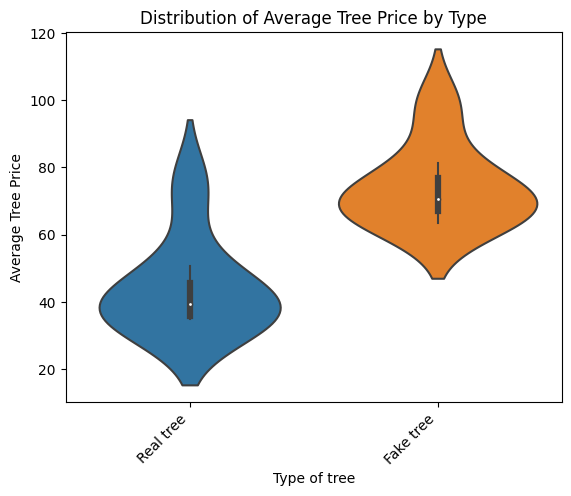

In [12]:
# Violin plot showing the distribution of Average Tree Price by Type
sns.violinplot(x='Type of tree', y='Average Tree Price', data=df)
plt.title('Distribution of Average Tree Price by Type')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the relationship between the Number of trees sold and Sales?**

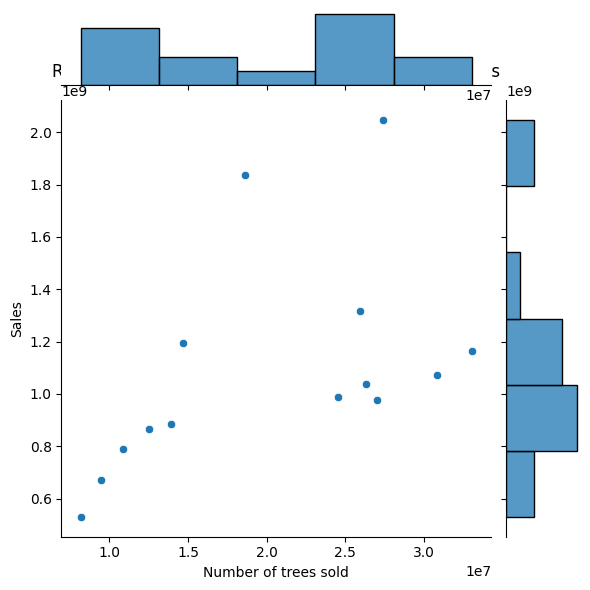

In [13]:
# Jointplot to visualize the relationship between Number of trees sold and Sales
sns.jointplot(x='Number of trees sold', y='Sales', data=df, kind='scatter')
plt.title('Relationship between Number of Trees Sold and Sales')
plt.show()


**Can we use Plotly to create an interactive scatter plot for Average Tree Price and Sales?**

In [14]:
# Plotly interactive scatter plot for Average Tree Price and Sales
fig = px.scatter(df, x='Average Tree Price', y='Sales', color='Type of tree', size='Number of trees sold',
                 hover_data=['Year'], title='Interactive Scatter Plot for Average Tree Price and Sales')
fig.show()


**How does the total sales revenue vary over the years?**

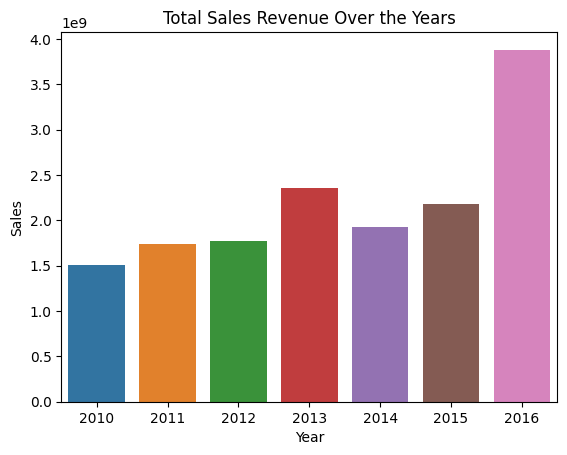

In [15]:
# Bar plot showing total sales revenue over the years
sns.barplot(x='Year', y='Sales', data=df.groupby('Year')['Sales'].sum().reset_index())
plt.title('Total Sales Revenue Over the Years')
plt.show()


**What is the distribution of Average Tree Price across different years?**

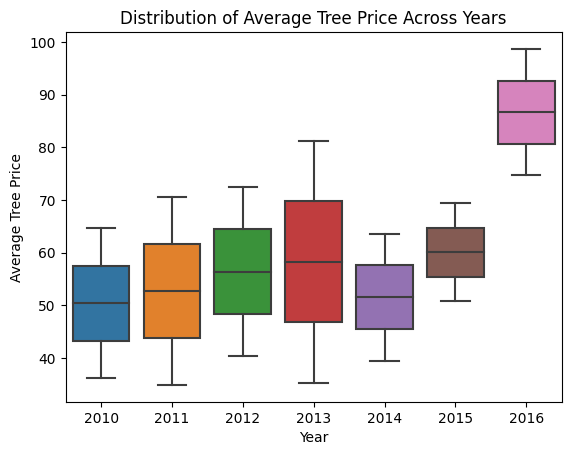

In [16]:
# Box plot for the distribution of Average Tree Price across different years
sns.boxplot(x='Year', y='Average Tree Price', data=df)
plt.title('Distribution of Average Tree Price Across Years')
plt.show()


**Can we visualize the trend of sales for each tree type using Altair?**

In [17]:
# Altair line chart for sales trend of each tree type
alt.Chart(df).mark_line().encode(
    x='Year',
    y='Sales',
    color='Type of tree',
    tooltip=['Year', 'Type of tree', 'Sales']
).interactive()


alt.Chart(...)

**How does the proportion of each tree type's sales change over the years?**

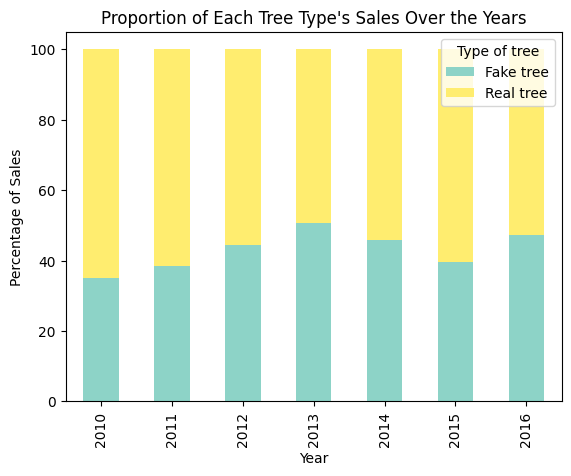

In [18]:
# Stacked bar plot for the proportion of each tree type's sales over the years
df_pivot_percentage = df.pivot_table(values='Sales', index='Year', columns='Type of tree', aggfunc='sum', fill_value=0)
df_pivot_percentage = df_pivot_percentage.divide(df_pivot_percentage.sum(axis=1), axis=0) * 100
df_pivot_percentage.plot.bar(stacked=True, colormap='Set3')
plt.title('Proportion of Each Tree Type\'s Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.show()


**Can we create a 3D scatter plot using Plotly to visualize the relationship between Sales, Average Tree Price, and Number of trees sold?**

In [19]:
# Plotly 3D scatter plot
fig = px.scatter_3d(df, x='Sales', y='Average Tree Price', z='Number of trees sold',
                    color='Type of tree', size='Sales', hover_data=['Year'],
                    title='3D Scatter Plot: Sales, Average Tree Price, and Number of Trees Sold')
fig.show()


**How do the sales vary for the top N tree types each year?**

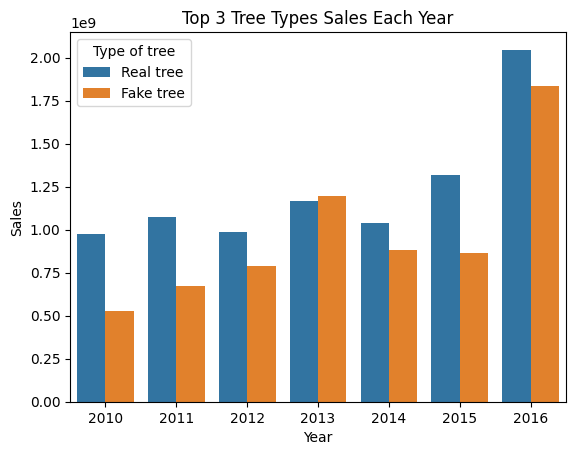

In [20]:
# Bar plot showing sales for the top N tree types each year
top_n = 3  # Change this value based on the desired number of top tree types
top_types_each_year = df.groupby(['Year', 'Type of tree'])['Sales'].sum().reset_index()
top_types_each_year = top_types_each_year.groupby('Year').apply(lambda x: x.nlargest(top_n, 'Sales'))
sns.barplot(x='Year', y='Sales', hue='Type of tree', data=top_types_each_year)
plt.title(f'Top {top_n} Tree Types Sales Each Year')
plt.show()


**How has the total sales revenue changed over the years for each tree type?**

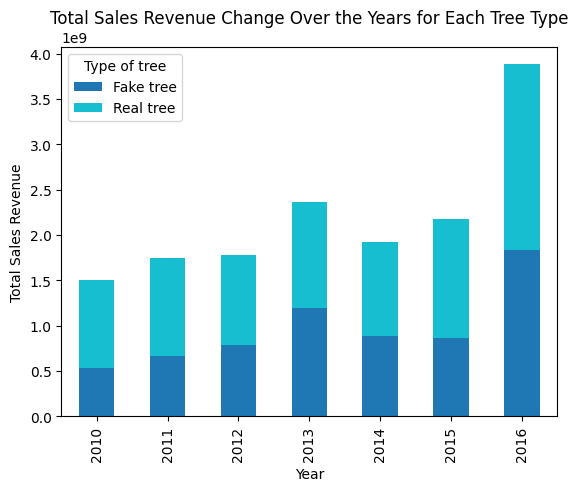

In [21]:
# Stacked bar plot for total sales revenue change over the years for each tree type
df_pivot_sales = df.pivot_table(values='Sales', index='Year', columns='Type of tree', aggfunc='sum', fill_value=0)
df_pivot_sales.plot.bar(stacked=True, colormap='tab10')
plt.title('Total Sales Revenue Change Over the Years for Each Tree Type')
plt.xlabel('Year')
plt.ylabel('Total Sales Revenue')
plt.show()


**How does the average tree price correlate with the number of trees sold?**

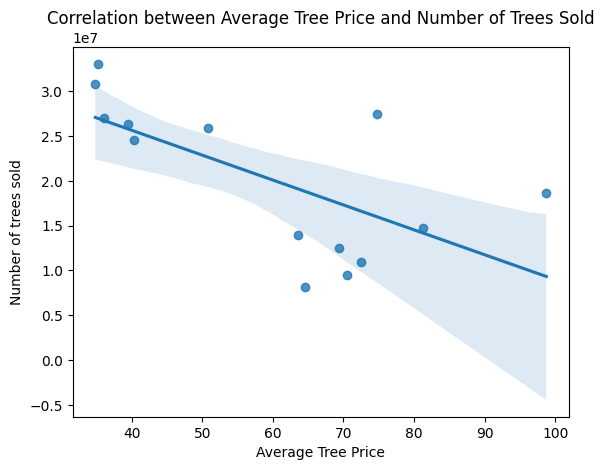

In [22]:
# Scatter plot with regression line for the correlation between Average Tree Price and Number of Trees Sold
sns.regplot(x='Average Tree Price', y='Number of trees sold', data=df)
plt.title('Correlation between Average Tree Price and Number of Trees Sold')
plt.show()


**Can we use Altair to create an interactive bar chart for the total number of trees sold by year?**

In [23]:
# Altair interactive bar chart for the total number of trees sold by year
alt.Chart(df.groupby('Year')['Number of trees sold'].sum().reset_index()).mark_bar().encode(
    x='Year',
    y='Number of trees sold',
    tooltip=['Year', 'Number of trees sold']
).interactive()


alt.Chart(...)

**How has the market share of each tree type changed over the years?**

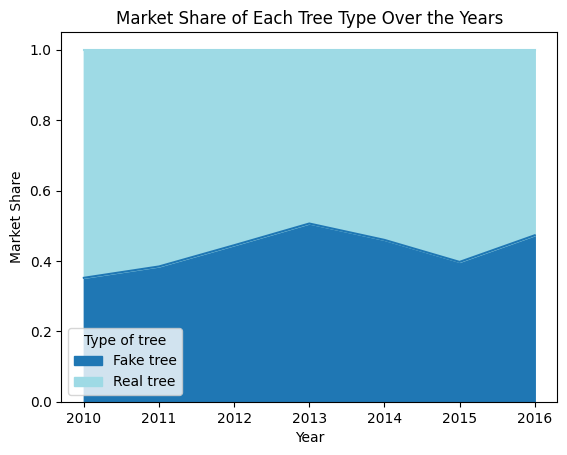

In [24]:
# Calculate market share for each tree type by year
df['Market Share'] = df.groupby('Year')['Sales'].transform(lambda x: x / x.sum())

# Stacked area chart for market share of each tree type over the years
df_pivot_market_share = df.pivot_table(values='Market Share', index='Year', columns='Type of tree', aggfunc='sum', fill_value=0)
df_pivot_market_share.plot.area(stacked=True, colormap='tab20')
plt.title('Market Share of Each Tree Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.show()


**Can we use Plotly to create a 3D surface plot for the relationship between Year, Number of trees sold, and Sales?**

In [25]:
# Plotly 3D surface plot
fig = px.scatter_3d(df, x='Year', y='Number of trees sold', z='Sales',
                    color='Type of tree', size='Sales', hover_data=['Year'],
                    title='3D Surface Plot: Year, Number of Trees Sold, and Sales')
fig.update_traces(marker=dict(size=5))
fig.show()


**How do the sales of premium tree types compare to regular tree types?**

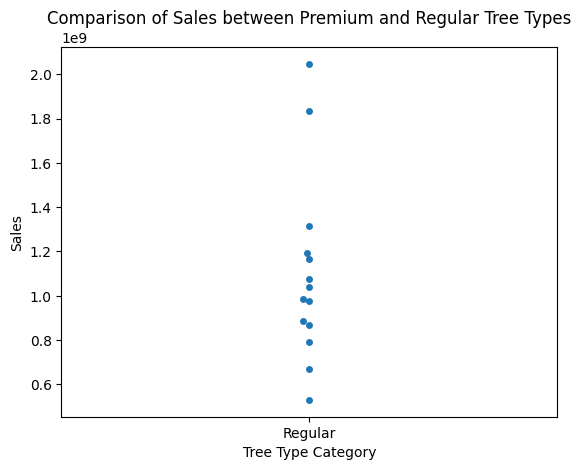

In [26]:
# Swarm plot for comparing sales of premium vs. regular tree types
premium_tree_types = ['Fraser Fir', 'Noble Fir']
df['Tree Type Category'] = np.where(df['Type of tree'].isin(premium_tree_types), 'Premium', 'Regular')
sns.swarmplot(x='Tree Type Category', y='Sales', data=df)
plt.title('Comparison of Sales between Premium and Regular Tree Types')
plt.show()


**Can we use Altair to create an interactive heatmap for the correlation matrix of numeric columns?**

In [27]:
# Altair interactive heatmap for correlation matrix
numeric_columns = ['Year', 'Number of trees sold', 'Average Tree Price', 'Sales']
correlation_matrix = df[numeric_columns].corr()
alt.Chart(correlation_matrix.reset_index().melt('index')).mark_rect().encode(
    x='index:N',
    y='variable:N',
    color='value:Q',
    tooltip=['index', 'variable', 'value']
).properties(
    title='Interactive Heatmap: Correlation Matrix of Numeric Columns'
).interactive()


alt.Chart(...)

**How has the distribution of Average Tree Price evolved over the years?**

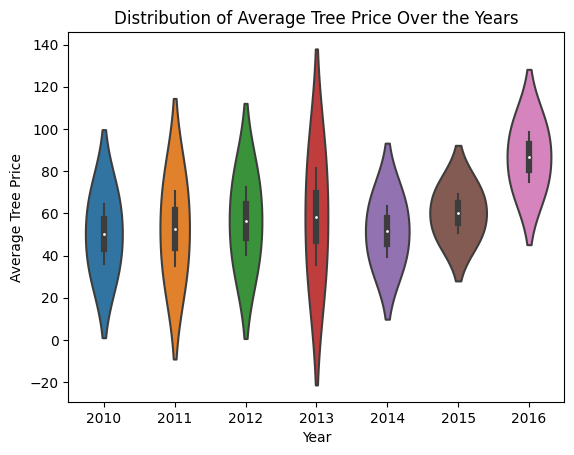

In [28]:
# Violin plot for the distribution of Average Tree Price over the years
sns.violinplot(x='Year', y='Average Tree Price', data=df)
plt.title('Distribution of Average Tree Price Over the Years')
plt.show()


**Can we visualize the trend of the total number of trees sold using a rolling average?**

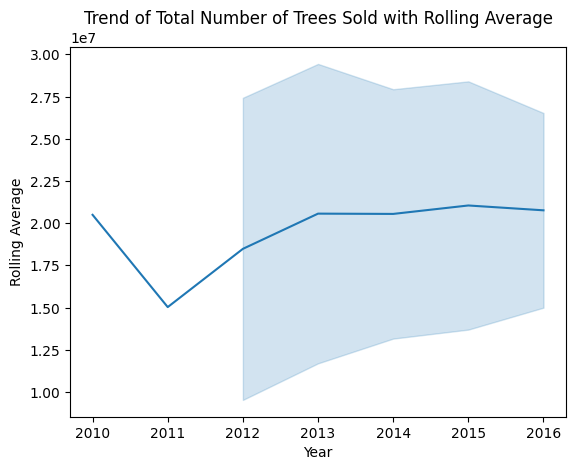

In [29]:
# Line plot for the trend of the total number of trees sold using a rolling average
df['Rolling Average'] = df['Number of trees sold'].rolling(window=3).mean()  # Adjust the window size as needed
sns.lineplot(x='Year', y='Rolling Average', data=df)
plt.title('Trend of Total Number of Trees Sold with Rolling Average')
plt.show()
